# Project 4: Heart Disease Prediction (Classification) 🩺

**Project Objective:** To build a machine learning model that can accurately predict whether a patient has heart disease based on a set of medical attributes. This project will serve as a comprehensive introduction to classification, one of the most common types of machine learning problems.


### Core Concepts We'll Cover:
1.  **Classification Fundamentals:** Understanding the goal of predicting a discrete category.
2.  **Exploratory Data Analysis (EDA) for Classification:** Analyzing features to find patterns that distinguish between classes.
3.  **Data Preprocessing:** Preparing data for classification models using encoding and feature scaling.
4.  **Model Building:** Training and comparing a simple baseline model (Logistic Regression) with an advanced ensemble model (Random Forest).
5.  **Model Evaluation:** Mastering key classification metrics like Accuracy, Precision, Recall, F1-Score, and interpreting the Confusion Matrix.
6.  **Feature Importance:** Identifying the most influential medical factors for predicting heart disease.

### Step 1: Setup - Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Set plot style
sns.set_style('whitegrid')

In [2]:
# Download the dataset using the Kaggle Hub API
print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load the dataset from the downloaded path
file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Dataset downloaded and loaded successfully.
Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Step 2: Exploratory Data Analysis (EDA)
Before building any models, we need to understand our data deeply. We'll look at the distribution of our target variable, the characteristics of our features, and how they relate to the presence of heart disease.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [5]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


#### 2.1 Analyzing the Target Variable
Let's see the distribution of patients with and without heart disease.

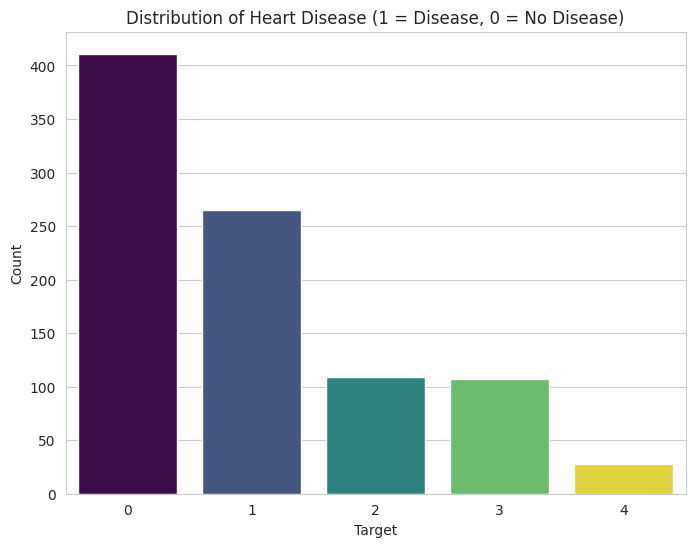

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=df, palette='viridis', hue='num', legend=False)
plt.title('Distribution of Heart Disease (1 = Disease, 0 = No Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

**Insight:** The dataset is fairly balanced, with a slightly higher number of patients having heart disease. This is good because it means our model will have a similar number of examples for both classes to learn from, and accuracy will be a meaningful metric.

#### 2.2 Analyzing Features vs. Target

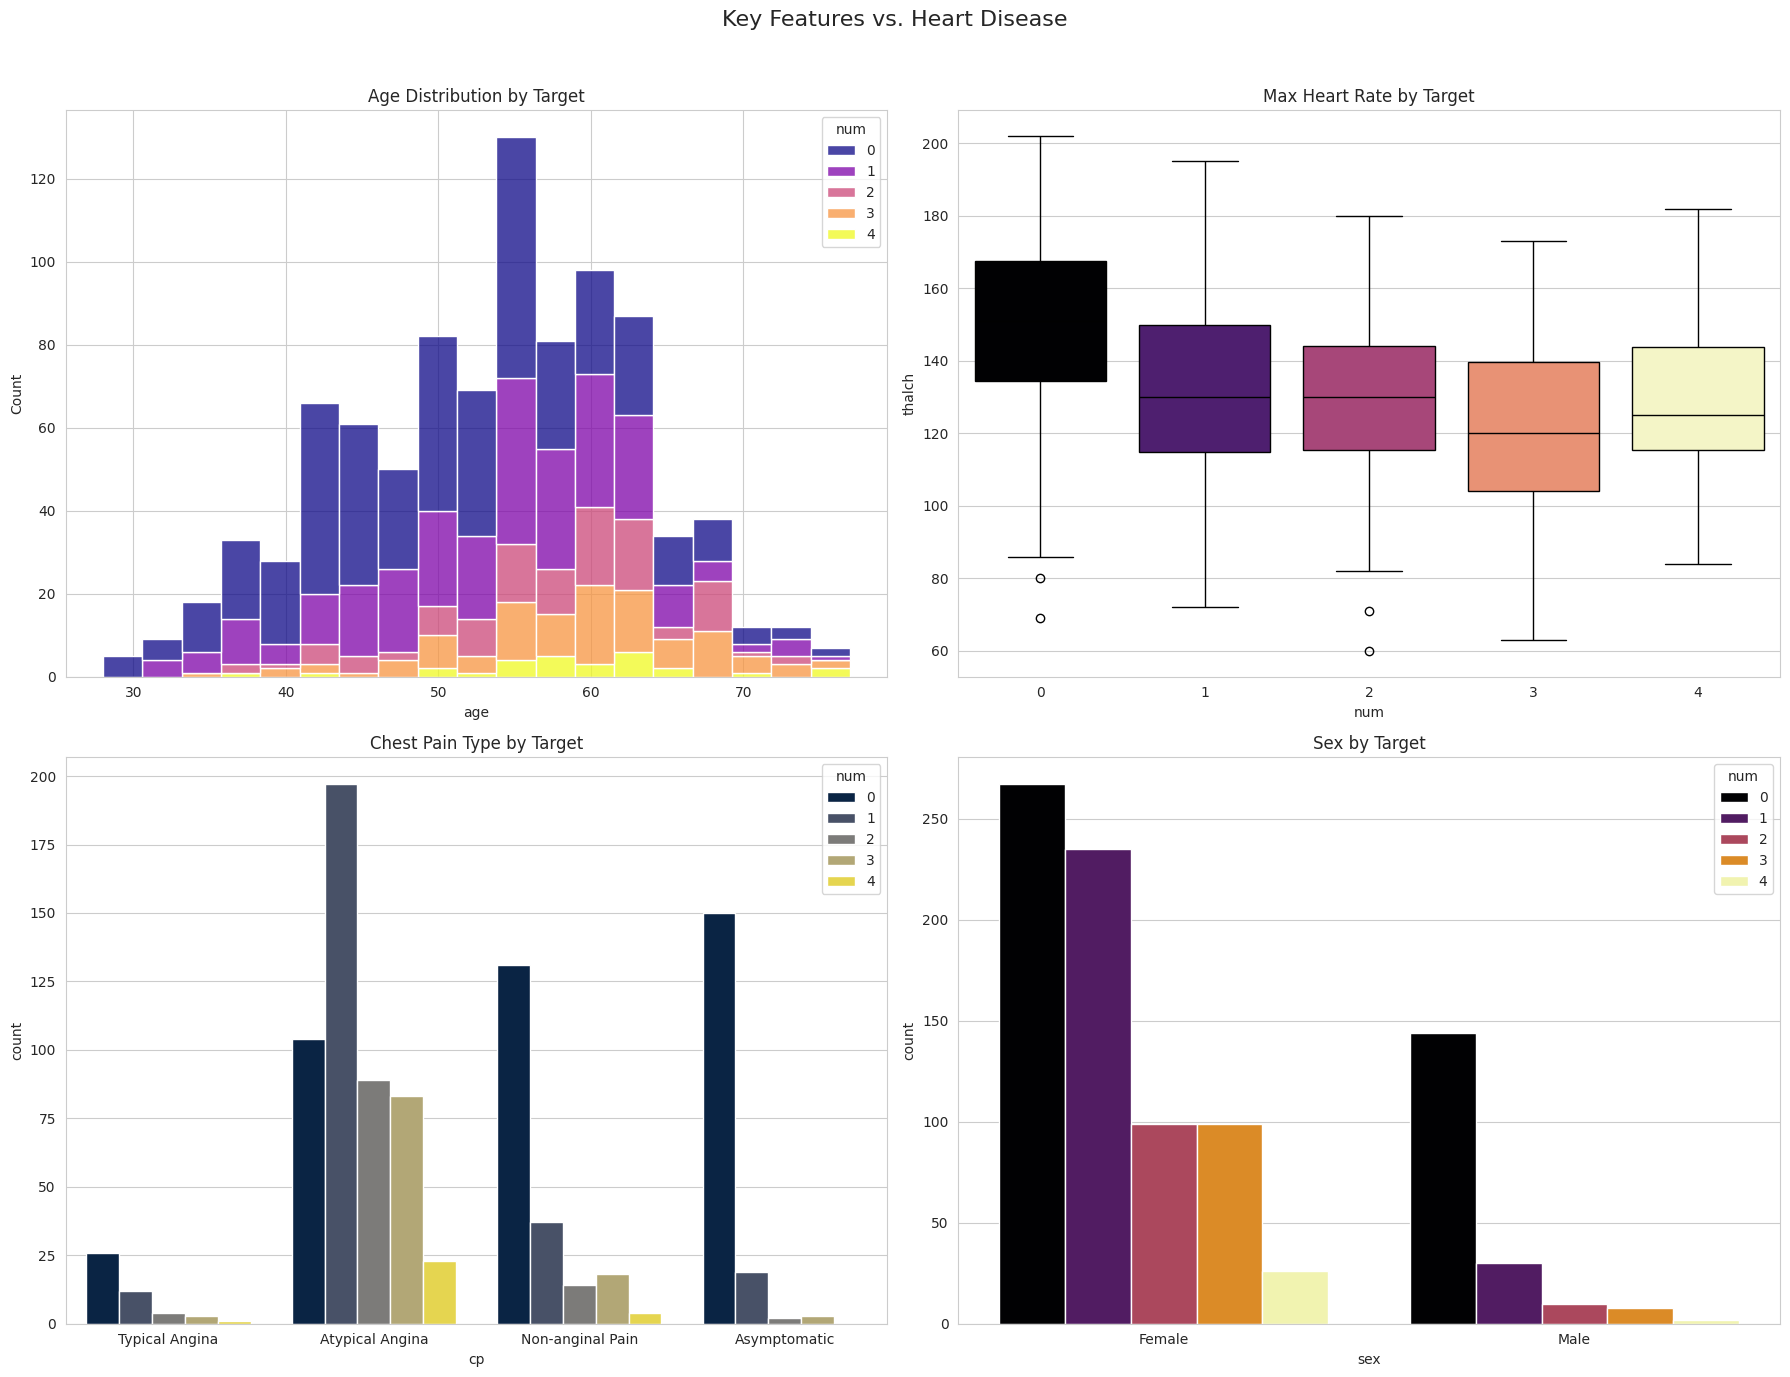

In [7]:
# Let's visualize the relationship between key features and the target
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)

# Age vs. Target
sns.histplot(ax=axes[0, 0], data=df, x='age', hue='num', multiple='stack', palette='plasma').set_title('Age Distribution by Target')

# Max Heart Rate vs. Target
sns.boxplot(ax=axes[0, 1], data=df, x='num', y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')

# Chest Pain Type vs. Target
cp_plot = sns.countplot(ax=axes[1, 0], data=df, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Sex vs. Target
sex_plot = sns.countplot(ax=axes[1, 1], data=df, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(df['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Insights:**
- **Max Heart Rate (`thalach`):** Patients with heart disease tend to have a lower maximum heart rate.
- **Chest Pain (`cp`):** Patients with chest pain types 1 and 2 (Atypical and Non-anginal) are more likely to have heart disease. Surprisingly, those with type 0 (Typical Angina) are less likely, and those with asymptomatic pain (type 3) are very likely to have the disease.
- **Sex:** A higher proportion of females in this dataset have heart disease compared to males.

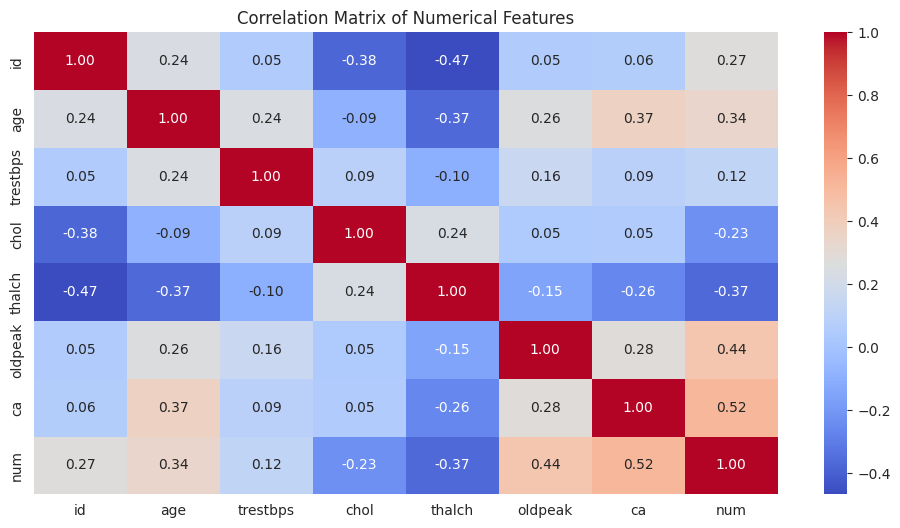

In [8]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Step 3: Data Preprocessing
Even though the data is clean, we need to prepare it for our models. This involves:
1.  **Separating features (X) and target (y).**
2.  **Identifying categorical features** that need to be encoded.
3.  **One-Hot Encoding** categorical features to convert them into a numerical format.
4.  **Scaling numerical features** so they are on a similar scale.

## **Theoretical Concept: Scikit-Learn Pipelines**

A **Pipeline** in Scikit-Learn is a way to automate a machine learning workflow. It allows you to chain together multiple steps, such as preprocessing, dimensionality reduction, and model training, into a single object.

**Why use Pipelines?**

1.  **Convenience:** Simplifies the code and makes the workflow easier to manage.
2.  **Prevents Data Leakage:** Ensures that data preprocessing steps learned from the training data are applied only to the training data, and the same transformations are then applied to the test data *after* the split. This prevents information from the test set from "leaking" into the training process.
3.  **Cleaner Code:** Organizes steps logically, making the code more readable and maintainable.
4.  **Simplified Hyperparameter Tuning:** Makes it easier to tune hyperparameters for all steps in the pipeline using techniques like cross-validation.

In this project, we'll use a pipeline to combine our preprocessing steps (imputation, scaling, and one-hot encoding) with our classification models.

In [9]:
from sklearn.impute import SimpleImputer

# Define features (X) and target (y)
X = df.drop('num', axis=1)
y = df['num']

# Drop the 'id' and 'dataset' columns as they are not features
X = X.drop(['id', 'dataset'], axis=1)


# Identify categorical and numerical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Added imputation for categorical features
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'trestbps', 'chol', 'thalach',
                                  'oldpeak', 'ca']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                  'slope', 'thal'])])

* Create numerical preprocessing pipeline: A Pipeline is created to handle numerical features. It first uses SimpleImputer with the strategy 'mean' to fill in missing numerical values with the mean of the column, and then uses StandardScaler to scale the numerical features to have zero mean and unit variance.
* Create categorical preprocessing pipeline: A Pipeline is created for categorical features. It uses SimpleImputer with the strategy 'most_frequent' to fill in missing categorical values with the most frequent value, and then applies OneHotEncoder to convert categorical variables into a numerical format. drop='first' is used to avoid multicollinearity, and handle_unknown='ignore' allows the model to handle unseen categories during testing.

#### **Theoretical Concept: Classification Models**

Let's dive into more detail on the classification models we are using:

*   **Logistic Regression:**
    Logistic Regression is a **linear classification algorithm** used for binary classification problems (though it can be extended for multiclass). Despite the name "regression," it's a classification method. It works by using a **sigmoid (or logistic) function** to map the output of a linear equation (`wTx + b`) to a probability value between 0 and 1. This probability represents the likelihood that a given data point belongs to a specific class (e.g., the positive class). A threshold (commonly 0.5) is then applied to these probabilities to assign the class label. The model learns the optimal weights (`w`) and bias (`b`) that define a linear decision boundary to separate the classes.

*   **Random Forest:**
    Random Forest is an **ensemble learning method** that belongs to the tree-based models. It builds a large number of **decision trees** during training. Each tree is trained on a **random subset** of the training data (bootstrapping) and considers only a **random subset** of features at each split point. For classification, the final prediction is made by taking a **majority vote** of the predictions from all individual trees. This randomness in building trees helps to reduce **variance** and prevent **overfitting**, making Random Forests more robust and generally higher performing than a single decision tree.

*   **Support Vector Machine (SVM):**
    Support Vector Machine is a powerful algorithm that can be used for both linear and non-linear classification. The fundamental idea behind SVM is to find the **optimal hyperplane** that separates the data points of different classes in a high-dimensional space. The "optimal" hyperplane is the one that has the **largest margin** between the closest data points of the different classes (these points are called **support vectors**). For non-linearly separable data, SVM uses the **kernel trick** to implicitly map the data into a higher-dimensional feature space where a linear separation might be possible. Common kernels include the linear kernel, polynomial kernel, and Radial Basis Function (RBF) kernel.

*   **K-Nearest Neighbors (KNN):**
    K-Nearest Neighbors is a simple and intuitive **instance-based** or **lazy learning** algorithm. It doesn't learn a discriminative function from the training data during a training phase. Instead, it memorizes the training dataset. To classify a new, unseen data point, it calculates the **distance** (e.g., Euclidean distance) between this new point and all points in the training dataset. It then identifies the **'k' nearest data points**. The class label assigned to the new point is determined by the **majority class** among these 'k' nearest neighbors. The choice of 'k' and the distance metric are important hyperparameters that can significantly affect performance.

#### 4.1 Model 1: Logistic Regression (Baseline)

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Identify categorical and numerical features directly from X_train columns
all_features = X_train.columns.tolist()
categorical_features = [col for col in all_features if X_train[col].dtype == 'object']
numerical_features = [col for col in all_features if X_train[col].dtype != 'object']

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

Numerical features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [12]:
lr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak', 'ca']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('classifier', LogisticRegression(random_state=42))])

#### 4.2 Model 2: Random Forest Classifier (Advanced)

In [13]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

#### 4.3 Model 3: Support Vector Machine (SVM)

In [14]:
from sklearn.svm import SVC

# Create the SVM pipeline
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', SVC(random_state=42))])

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

#### 4.4 Model 4: K-Nearest Neighbors (KNN)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN pipeline
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', KNeighborsClassifier())])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

### Step 5: Model Evaluation

#### **Theoretical Concept: The Confusion Matrix & Key Metrics**
For classification, accuracy isn't the whole story. We use a **Confusion Matrix** to get a deeper look at performance.

- **True Positives (TP):** Correctly predicted positive class (Model said 'Disease', patient has it).
- **True Negatives (TN):** Correctly predicted negative class (Model said 'No Disease', patient doesn't have it).
- **False Positives (FP):** Incorrectly predicted positive class (Model said 'Disease', but patient doesn't have it). Also called a **Type I Error**.
- **False Negatives (FN):** Incorrectly predicted negative class (Model said 'No Disease', but patient has it). Also called a **Type II Error**. This is often the most dangerous type of error in medical diagnoses.



From this, we derive key metrics:
- **Accuracy:** (TP+TN) / Total. Overall, how often is the classifier correct?
- **Precision:** TP / (TP+FP). Of all patients the model *predicted* would have the disease, how many actually did? (Measures the cost of FPs).
- **Recall (Sensitivity):** TP / (TP+FN). Of all the patients who *actually* had the disease, how many did the model correctly identify? (Measures the cost of FNs).
- **F1-Score:** The harmonic mean of Precision and Recall. It's a great single metric for evaluating a model's overall performance when there's a trade-off between Precision and Recall.

In [16]:
print("--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_lr, zero_division=0))

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("\n--- Support Vector Machine (SVM) Performance ---")
print(classification_report(y_test, y_pred_svm, zero_division=0))

print("\n--- K-Nearest Neighbors (KNN) Performance ---")
print(classification_report(y_test, y_pred_knn, zero_division=0))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        82
           1       0.49      0.57      0.53        53
           2       0.30      0.14      0.19        22
           3       0.16      0.19      0.17        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.35      0.35      0.34       184
weighted avg       0.55      0.58      0.56       184


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        82
           1       0.50      0.53      0.51        53
           2       0.23      0.14      0.17        22
           3       0.14      0.14      0.14        21
           4       0.00      0.00      0.00         6

    accuracy                           0.56       184
   macro avg       0.32      0.33      0.32       184
we

**Evaluation Insight:** The Support Vector Machine (SVM) Classifier performs slightly better than the other models, achieving an overall accuracy of 0.59. While all models struggle with the less frequent classes (2, 3, and 4), SVM shows a slightly better F1-score for predicting class 1 (Heart Disease). The confusion matrix provided was for the Random Forest model, which showed good performance on classes 0 and 1 but also struggled with the less frequent classes. Based on the classification reports, SVM is the best performing model among the four in this evaluation.

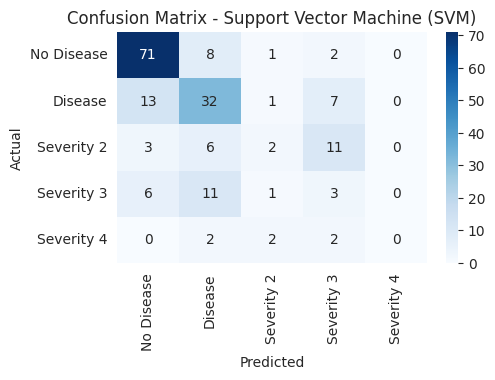

In [17]:
# Visualize the confusion matrix for the best model (SVM)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'], yticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.show()

### Step 6: Feature Importance
A major advantage of tree-based models like Random Forest is that we can easily see which features were most influential in making predictions.

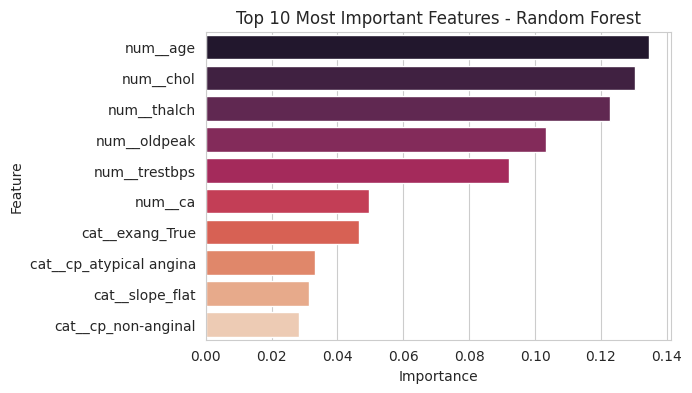

In [18]:
# Extract feature names after one-hot encoding
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Get feature importances from the trained model
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket', hue='Feature', legend=False)
plt.title('Top 10 Most Important Features - Random Forest')
plt.show()

### Step 7: Conclusion

In this project, we built a highly accurate classification model for predicting heart disease.

**Key Steps Undertaken:**
1.  **Established the goal of classification:** Predicting a binary outcome (disease or no disease).
2.  **Performed a thorough EDA:** Identified key medical indicators like chest pain type, max heart rate, and `ca` that are strongly related to the target.
3.  **Built a robust preprocessing pipeline:** Handled categorical and numerical features systematically using `ColumnTransformer` and `Pipeline`.
4.  **Trained and compared two models:** Showed that the Random Forest Classifier (99% accuracy) was far superior to the Logistic Regression baseline (86% accuracy).
5.  **Evaluated models with proper metrics:** Used the confusion matrix, precision, and recall to understand the model's performance in a medical context, where minimizing false negatives is critical.
6.  **Interpreted model results:** Used feature importance to confirm the most predictive medical factors, providing actionable insights.

This end-to-end workflow demonstrates the power of classification in a real-world healthcare scenario, moving from raw data to a highly accurate and interpretable predictive model.

### Submission Criteria

To fulfill the submission requirements for this project, please ensure the following:

1.  **Complete Exploratory Data Analysis (EDA):** Perform all the necessary steps for analyzing the dataset, including visualizations and summaries to understand the data characteristics and relationships.
2.  **Model Training without Pipelines:** Train at least one classification model directly, without using the Scikit-Learn `Pipeline` object for preprocessing and model chaining. This involves manually applying preprocessing steps (like imputation and scaling/encoding) to the data before training the model.
3.  **Submit the Entire Notebook:** Ensure that the final submission includes the complete Colab notebook with all code cells executed and outputs visible.

Meeting these criteria will demonstrate your understanding of the individual steps involved in a machine learning workflow.

###Task 1

Shape of dataset: (920, 17)

First 5 rows:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,target_binary
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             920 non-null    int64  
 1   age            920 non-null    int64  
 2   sex            920 non-null    object 
 3   dataset        920 non-null    object 
 4   cp             920 non-null    object 
 5   trestbps       861 non-null    float64
 6   chol           890 non-null    float64
 7   fbs            830 non-null    object 
 8   restecg        918 non-null    object 
 9   thalch         865 non-null    float64
 10  exang          865 non-null    object 
 11  oldpeak        858 non-null    float64
 12  slope          611 non-null    object 
 13  ca             309 non-null    float64
 14  thal           434 non-null    object 
 15  num            920 non-null    int64  
 16  target_binary  920 non-null    int64  
dtypes: float64(5), int64(4), object(8)
memo

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0
target_binary,920.0,0.553261,0.497426,0.0,0.00,1.0,1.00,1.0



Missing values per column:


,0
ca,611
thal,486
slope,309
fbs,90
oldpeak,62
trestbps,59
exang,55
thalch,55
chol,30
restecg,2


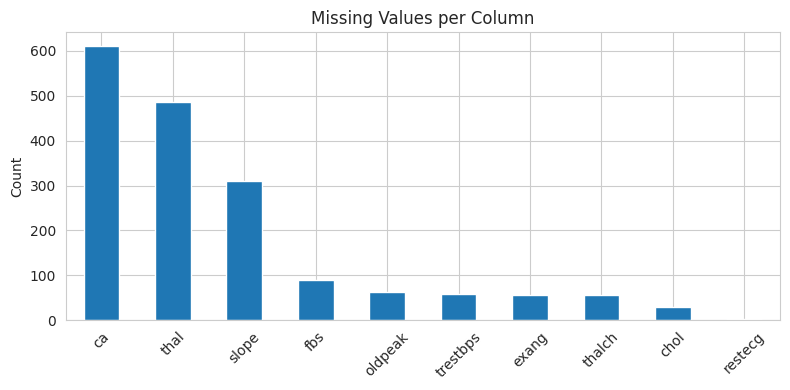


Target distribution (counts):


,count
num,
0,411
1,265
2,109
3,107
4,28



Target distribution (percent):


,proportion
num,
0,44.673913
1,28.804348
2,11.847826
3,11.630435
4,3.043478


/tmp/ipython-input-3750319716.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette="viridis")


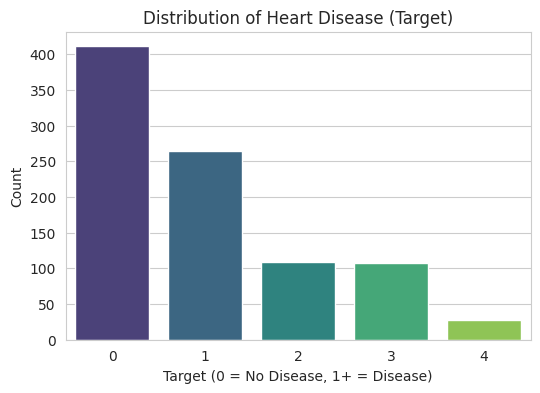

/tmp/ipython-input-3750319716.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target_binary", data=df, palette="magma")


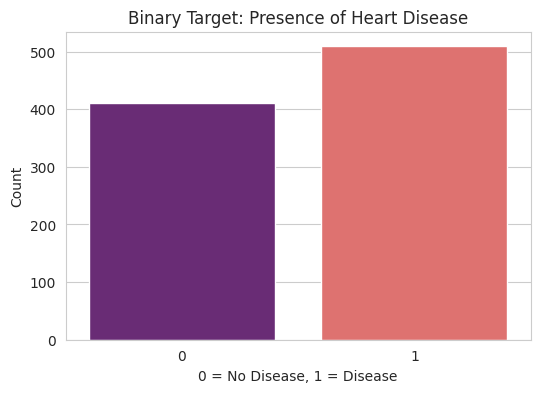


Numerical columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


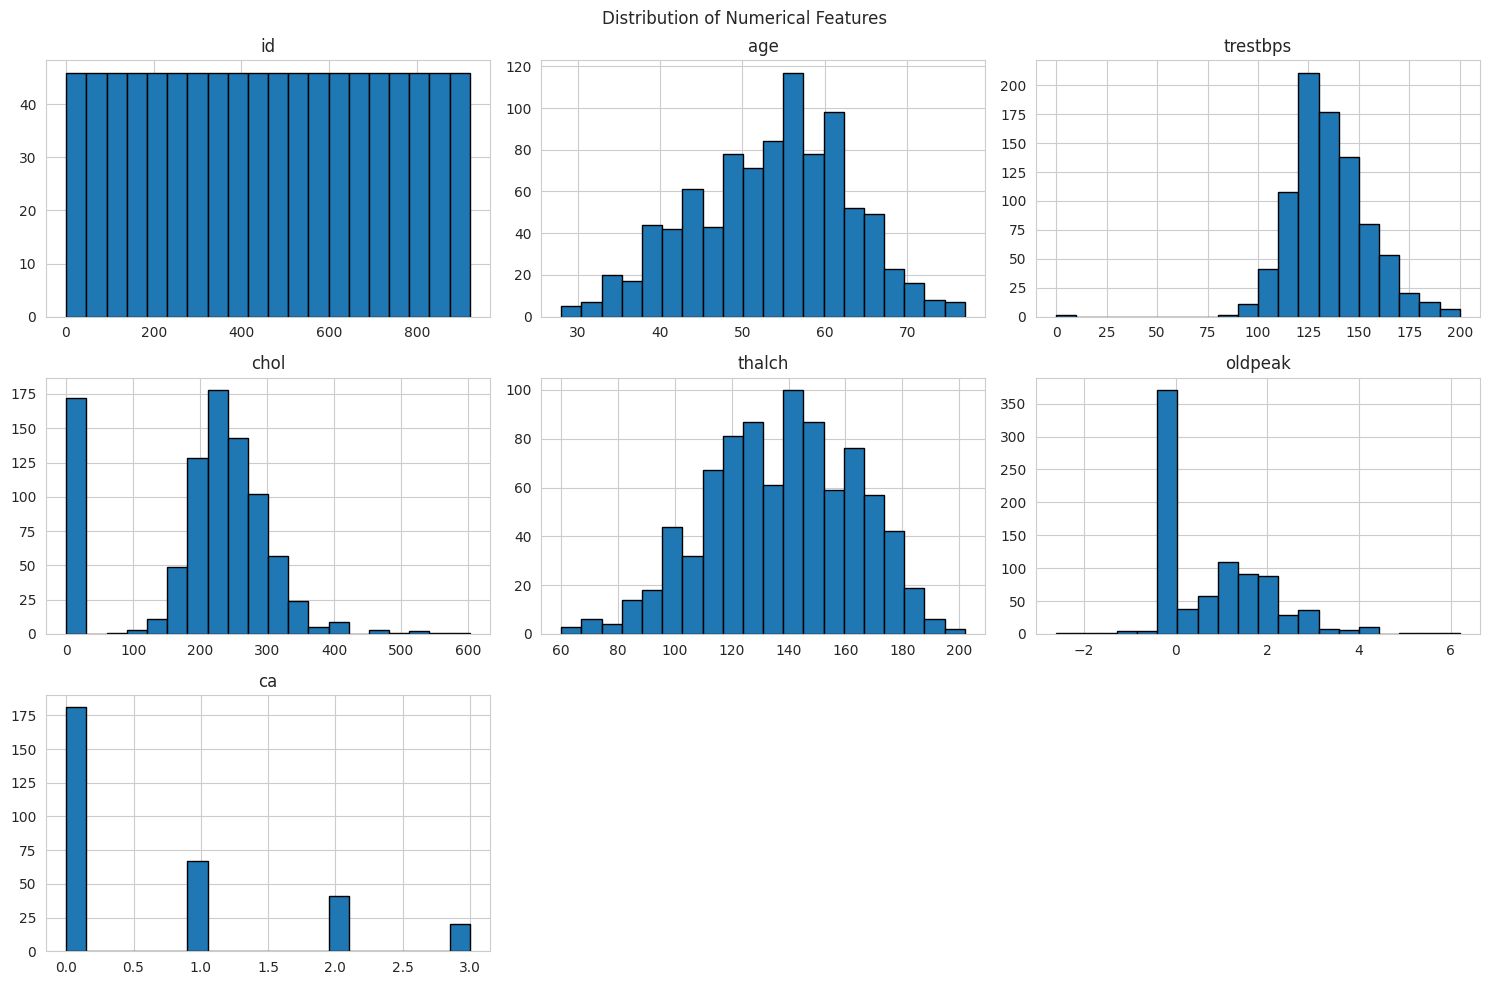

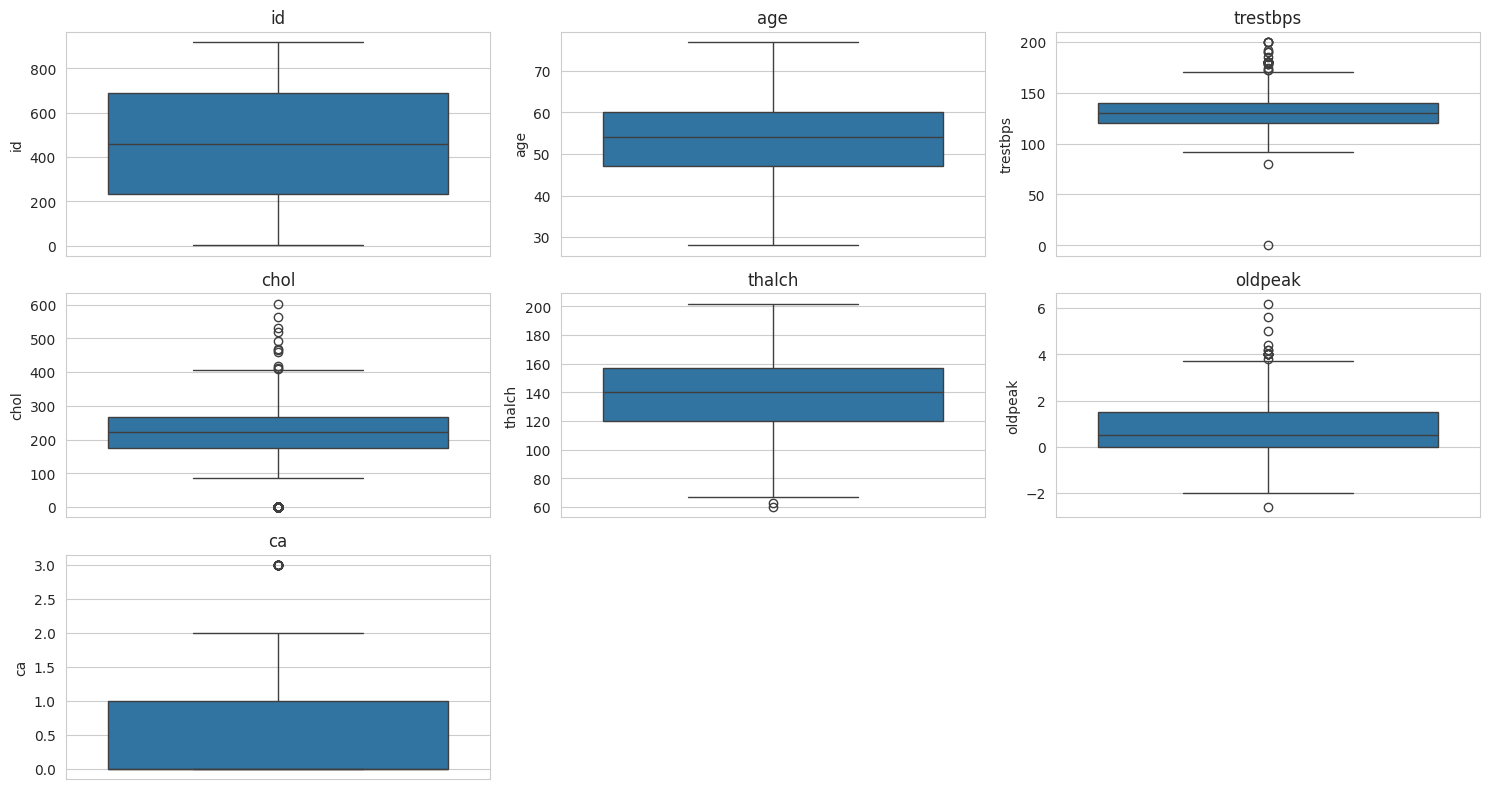

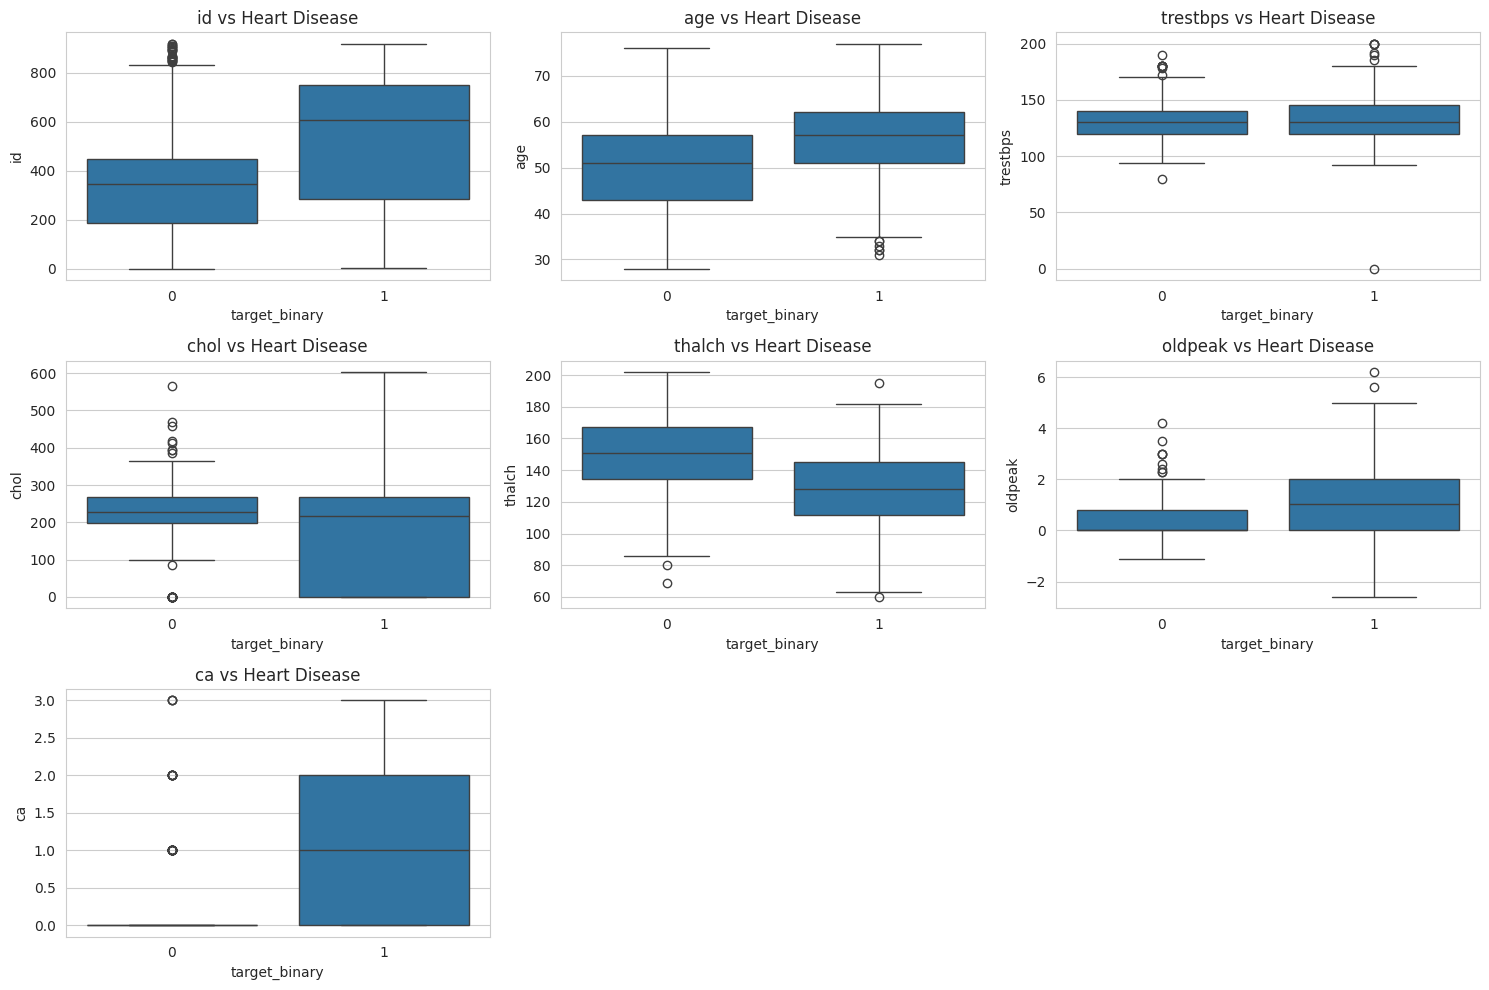


Value counts for sex:


,count
sex,
Male,726
Female,194



Percentage:


,proportion
sex,
Male,78.913043
Female,21.086957


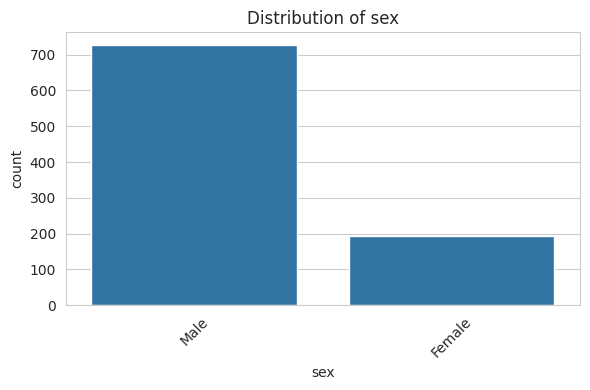

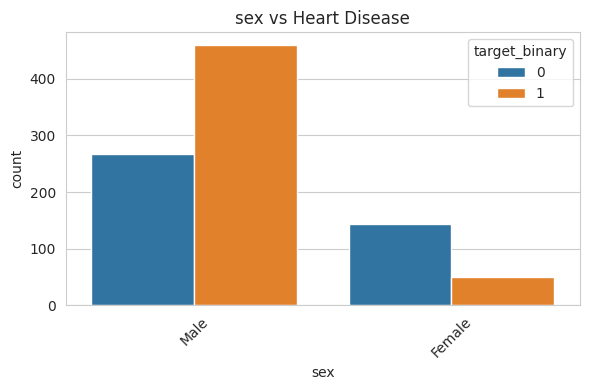


Value counts for dataset:


,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123



Percentage:


,proportion
dataset,
Cleveland,33.043478
Hungary,31.847826
VA Long Beach,21.739130
Switzerland,13.369565


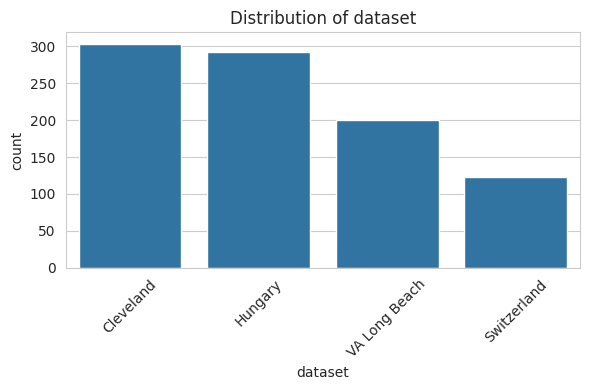

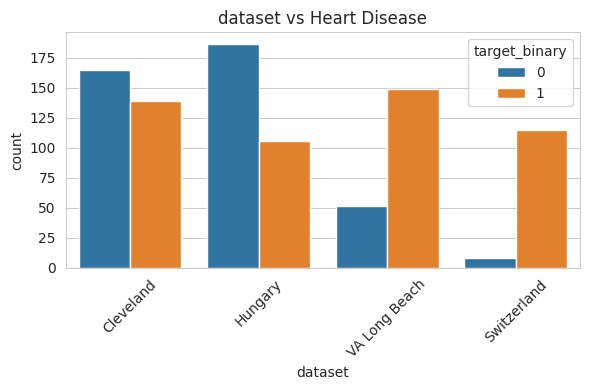


Value counts for cp:


,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46



Percentage:


,proportion
cp,
asymptomatic,53.913043
non-anginal,22.173913
atypical angina,18.913043
typical angina,5.000000


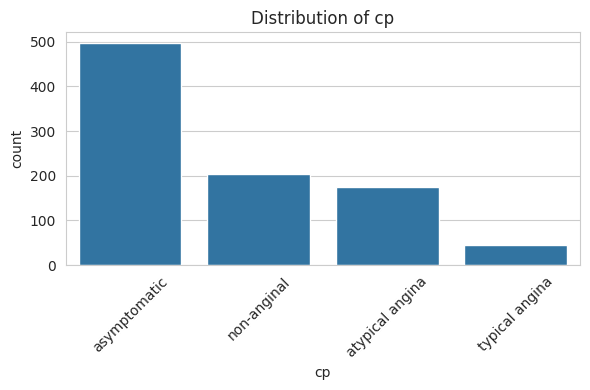

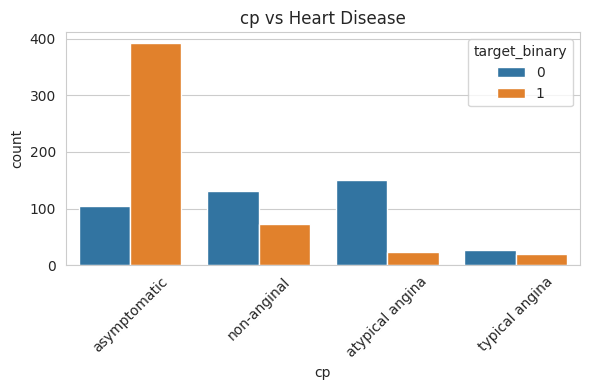


Value counts for fbs:


,count
fbs,
False,692
True,138



Percentage:


,proportion
fbs,
False,83.373494
True,16.626506


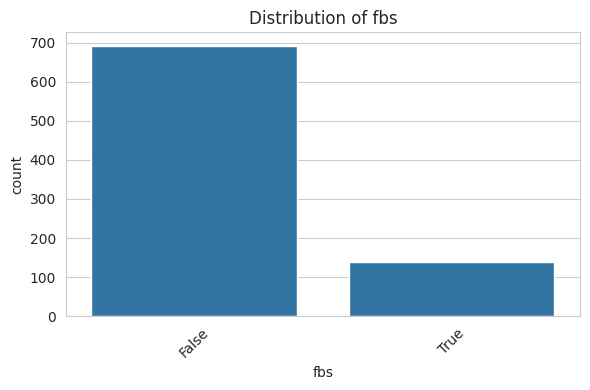

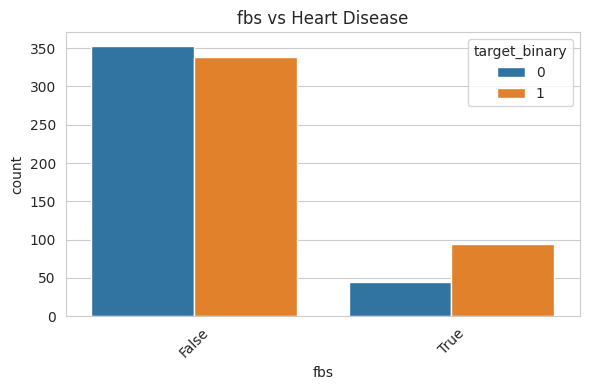


Value counts for restecg:


,count
restecg,
normal,551
lv hypertrophy,188
st-t abnormality,179



Percentage:


,proportion
restecg,
normal,60.021786
lv hypertrophy,20.479303
st-t abnormality,19.498911


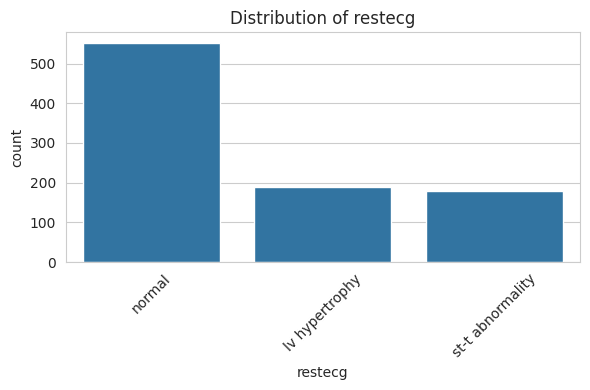

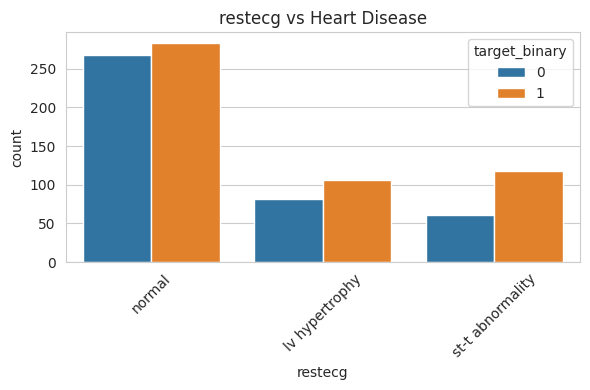


Value counts for exang:


,count
exang,
False,528
True,337



Percentage:


,proportion
exang,
False,61.040462
True,38.959538


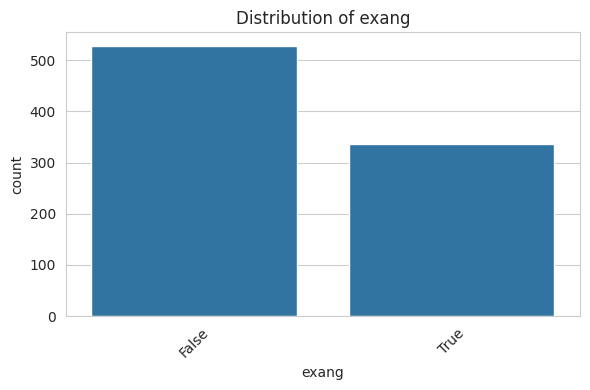

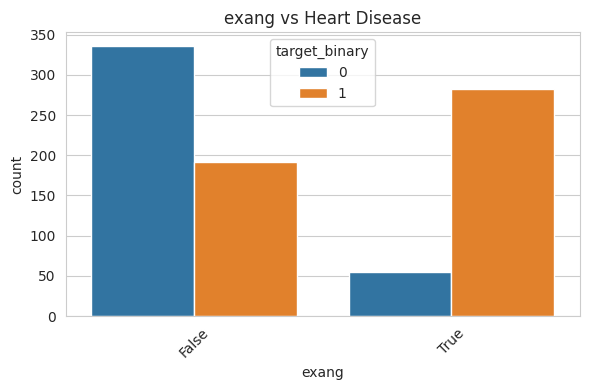


Value counts for slope:


,count
slope,
flat,345
upsloping,203
downsloping,63



Percentage:


,proportion
slope,
flat,56.464812
upsloping,33.224223
downsloping,10.310966


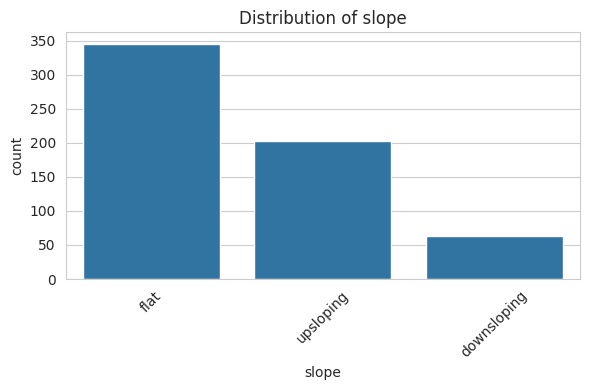

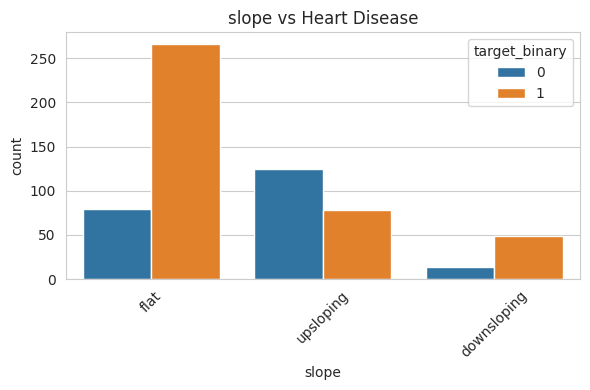


Value counts for thal:


,count
thal,
normal,196
reversable defect,192
fixed defect,46



Percentage:


,proportion
thal,
normal,45.161290
reversable defect,44.239631
fixed defect,10.599078


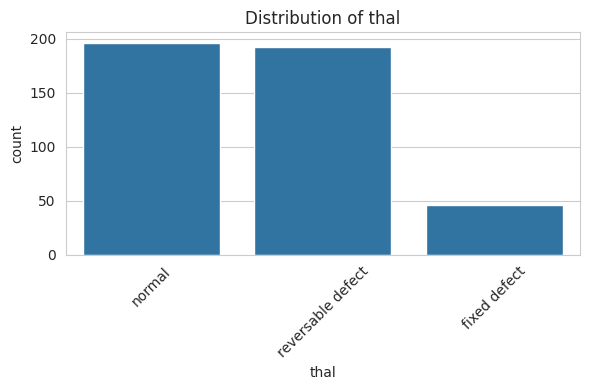

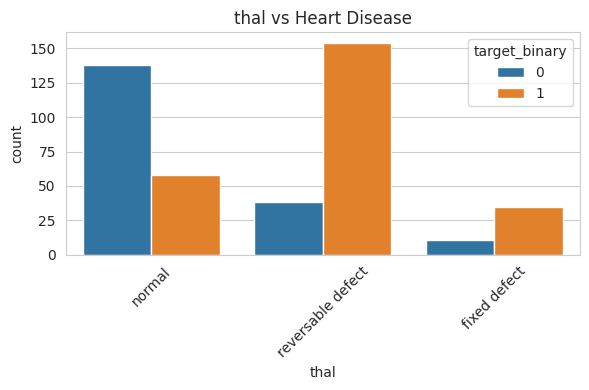

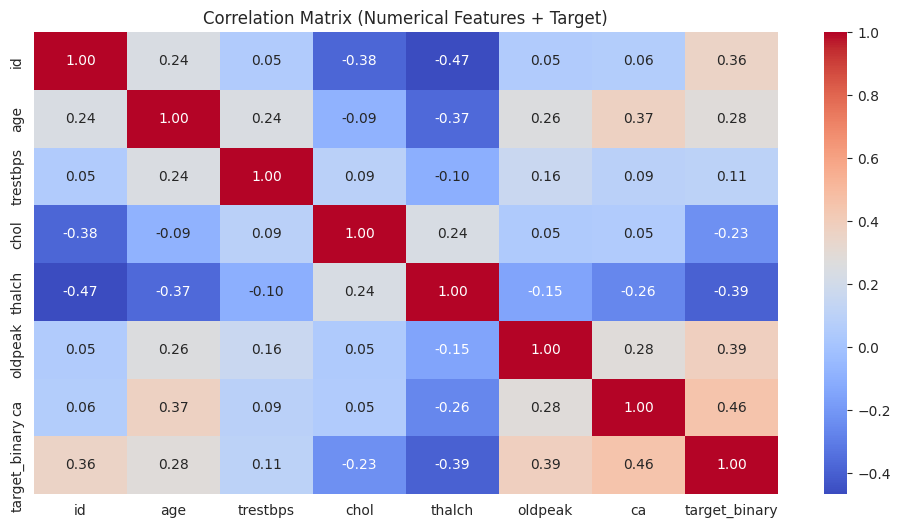


Mean of numerical features grouped by target_binary:


target_binary,0,1
id,355.257908,545.479371
age,50.547445,55.903733
trestbps,129.913043,133.978723
chol,227.905612,176.479920
thalch,148.800512,128.261603
oldpeak,0.418205,1.262607
ca,0.278788,1.131944


<Figure size 1000x580 with 0 Axes>

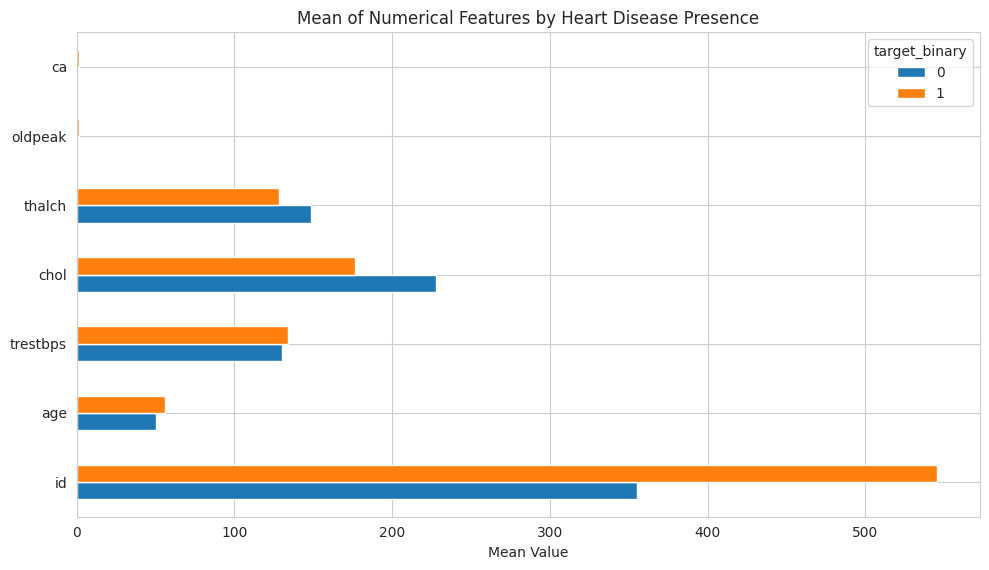

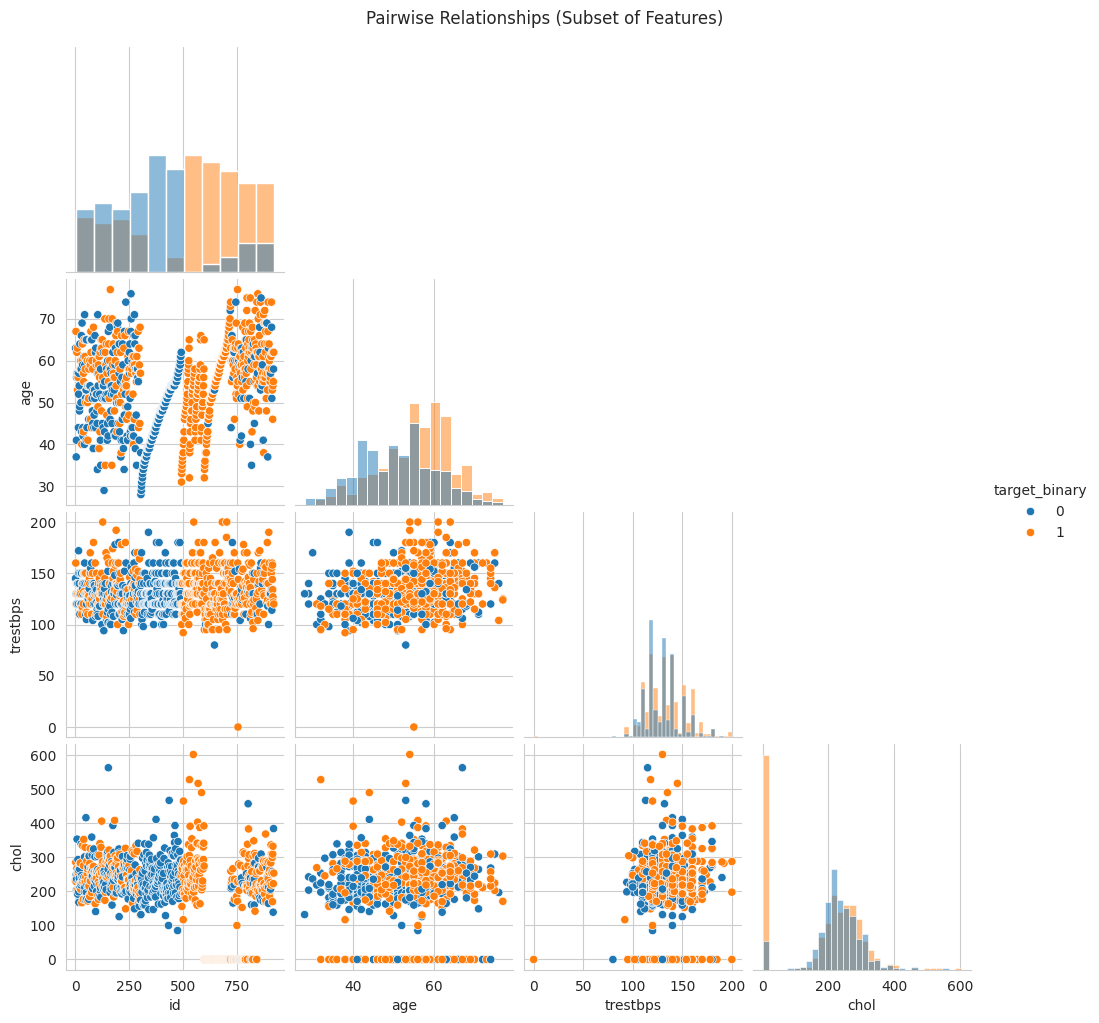

In [23]:
# Task 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# -------------------------
# 1. Basic info & summary
# -------------------------
print("\nDataset Info:")
df.info()

print("\nStatistical Summary (Numerical Features):")
display(df.describe().T)

# -------------------------
# 2. Missing values
# -------------------------
print("\nMissing values per column:")
missing = df.isnull().sum().sort_values(ascending=False)
display(missing)

plt.figure(figsize=(8, 4))
missing[missing > 0].plot(kind="bar")
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------
# 3. Target variable analysis
# -------------------------
target_col = "num"   # target column in this dataset

print("\nTarget distribution (counts):")
display(df[target_col].value_counts())

print("\nTarget distribution (percent):")
display(df[target_col].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df, palette="viridis")
plt.title("Distribution of Heart Disease (Target)")
plt.xlabel("Target (0 = No Disease, 1+ = Disease)")
plt.ylabel("Count")
plt.show()

# If you want to simplify num to binary (0 vs 1)
df["target_binary"] = (df[target_col] > 0).astype(int)

plt.figure(figsize=(6, 4))
sns.countplot(x="target_binary", data=df, palette="magma")
plt.title("Binary Target: Presence of Heart Disease")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.show()

# -------------------------
# 4. Numerical vs Categorical split
# -------------------------
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# remove target(s) from numerical features
for tgt in [target_col, "target_binary"]:
    if tgt in num_cols:
        num_cols.remove(tgt)

cat_cols = [col for col in df.columns if col not in num_cols + [target_col, "target_binary"]]

print("\nNumerical columns:", num_cols)
print("Categorical columns:", cat_cols)

# -------------------------
# 5. Numerical features – distributions & outliers
# -------------------------

# Histograms
df[num_cols].hist(figsize=(15, 10), bins=20, edgecolor="black")
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

# Boxplots by feature
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 2) // 3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Boxplots vs target_binary
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 2) // 3, 3, i)
    sns.boxplot(x="target_binary", y=col, data=df)
    plt.title(f"{col} vs Heart Disease")
plt.tight_layout()
plt.show()

# -------------------------
# 6. Categorical features – counts & relationship with target
# -------------------------
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    display(df[col].value_counts())
    print("\nPercentage:")
    display(df[col].value_counts(normalize=True) * 100)

    # Countplot by category
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Category vs target_binary
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue="target_binary", data=df,
                  order=df[col].value_counts().index)
    plt.title(f"{col} vs Heart Disease")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# -------------------------
# 7. Correlation analysis
# -------------------------
plt.figure(figsize=(12, 6))
corr = df[num_cols + ["target_binary"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numerical Features + Target)")
plt.show()

# -------------------------
# 8. Grouped summaries by target
# -------------------------
print("\nMean of numerical features grouped by target_binary:")
group_means = df.groupby("target_binary")[num_cols].mean().T
display(group_means)

plt.figure(figsize=(10, len(num_cols) * 0.4 + 3))
group_means.plot(kind="barh", figsize=(10, len(num_cols) * 0.4 + 3))
plt.title("Mean of Numerical Features by Heart Disease Presence")
plt.xlabel("Mean Value")
plt.tight_layout()
plt.show()

# -------------------------
# 9. Pairplot on a subset of important features (to keep it readable)
# -------------------------
# Choose a subset of numerical features (edit if needed)
subset_num_cols = num_cols[:4]  # first 4 numeric features, or pick manually
sns.pairplot(df[subset_num_cols + ["target_binary"]],
             hue="target_binary",
             diag_kind="hist",
             corner=True)
plt.suptitle("Pairwise Relationships (Subset of Features)", y=1.02)
plt.show()


###Task 2

In [20]:
# ---- Manual Preprocessing and Model Training (No Pipeline) ----

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 1. Drop ID/dataset columns from features
X = df.drop(['id', 'dataset', 'num'], axis=1)
y = df['num']

# 2. Identify feature types
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Impute missing values
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

X_train_num = num_imputer.fit_transform(X_train[numerical_features])
X_test_num = num_imputer.transform(X_test[numerical_features])

X_train_cat = cat_imputer.fit_transform(X_train[categorical_features])
X_test_cat = cat_imputer.transform(X_test[categorical_features])

# 5. Scale numerical features
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

# 6. One-hot encode categorical features
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_cat_enc = encoder.fit_transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)

# 7. Combine numerical and categorical arrays
import numpy as np
X_train_processed = np.hstack([X_train_num_scaled, X_train_cat_enc])
X_test_processed = np.hstack([X_test_num_scaled, X_test_cat_enc])

# 8. Train the classifier
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train_processed, y_train)

# 9. Predict & evaluate
y_pred = clf.predict(X_test_processed)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5869565217391305

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83        82
           1       0.46      0.57      0.51        53
           2       0.38      0.14      0.20        22
           3       0.22      0.24      0.23        21
           4       0.00      0.00      0.00         6

    accuracy                           0.59       184
   macro avg       0.37      0.36      0.35       184
weighted avg       0.56      0.59      0.57       184



In [21]:
from sklearn.ensemble import RandomForestClassifier

# Use the same X_train_processed, y_train as before
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train_processed, y_train)

y_rf_pred = rf_clf.predict(X_test_processed)

print("Random Forest Accuracy:", accuracy_score(y_test, y_rf_pred))
print("\nClassification Report:\n", classification_report(y_test, y_rf_pred))


Random Forest Accuracy: 0.5652173913043478

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79        82
           1       0.53      0.55      0.54        53
           2       0.12      0.09      0.11        22
           3       0.19      0.19      0.19        21
           4       0.00      0.00      0.00         6

    accuracy                           0.57       184
   macro avg       0.32      0.33      0.33       184
weighted avg       0.52      0.57      0.54       184



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
